In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [2]:
def combine_files(paths, output_path=None):
    df = pd.DataFrame()
    for path in paths:
        df_i = pd.read_csv(path,index_col=None)
        df = pd.concat([df, df_i], axis=0)
        
    df.index = range(df.shape[0])
    if output_path is not None:
        df.to_csv(output_path,index=False)
    return df

In [3]:
def plotting(oper_char_df, x_axis='p', hue='method', plot_size=False):
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    if plot_size:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=1, ncols=7, figsize=(12,8))
    else:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(12,8))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    
    F1pi_plot = sns.boxplot(y=oper_char_df["F1 score (post inf)"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    F1pi_plot.set(title='F1 score (post inf)')
    
    power_plot = sns.boxplot(y=oper_char_df["Cond. power"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax5,
                          linewidth=1)
    power_plot.set(title='Conditional power')
    
    FDP_plot = sns.boxplot(y=oper_char_df["FDP"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax6,
                          linewidth=1)
    FDP_plot.set(title='FDP')
    
    if plot_size:
        size_plot = sns.boxplot(y=oper_char_df["E size"],
                              x=oper_char_df[x_axis],
                              hue=oper_char_df[hue],
                              palette="pastel",
                              orient="v", ax=ax7,
                              linewidth=1)
        size_plot.set(title='|E|')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    F1pi_plot.legend_.remove()
    if plot_size:
        size_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

In [4]:
paths_result = ["GGM_comp_logic1_0_100.csv"]
oper_char = combine_files(paths_result)

Mean coverage rate/length:
                             coverage rate  avg length  F1 score   
weight const method                                                
0.2          Approx               0.887711    0.334391  0.277647  \
             Data Splitting       0.876252    0.362660  0.263810   
             Naive                0.528533    0.248557  0.332352   
0.3          Approx               0.930714    0.339608  0.286983   
             Data Splitting       0.939667    0.360325  0.235387   
             Naive                0.420903    0.253078  0.330762   
0.4          Approx               0.885833    0.340693  0.251951   
             Data Splitting       0.881000    0.369810  0.241068   
             Naive                0.540000    0.258519  0.333076   
0.5          Approx               0.918333    0.331709  0.305268   
             Data Splitting       0.905000    0.375527  0.254287   
             Naive                0.378333    0.265026  0.312082   

                    

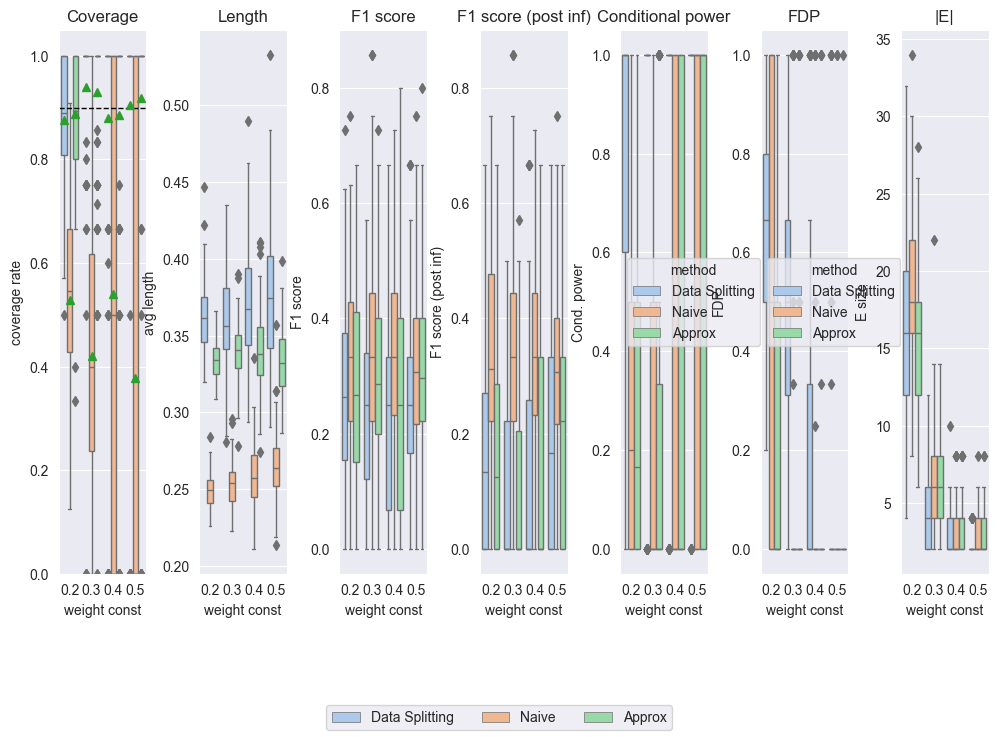

In [5]:
plotting(oper_char, x_axis="weight const", hue="method", plot_size=True)

# Plotting Motivating Example

In [6]:
dir = "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/toy/"
paths_result = [dir+"GGM_comp_logic1_1_0_125.csv", 
                dir+"GGM_comp_logic1_1_0_125.csv",
                dir+"GGM_comp_logic1_1_250_375.csv",
                dir+"GGM_comp_logic1_1_375_500.csv"]
oper_char = combine_files(paths_result)

In [7]:
oper_char

,weight const,coverage rate,avg length,method,F1 score,F1 score (post inf),E size,Cond. power,FDP
0,0.2,0.875000,0.460525,Data Splitting,0.363636,0.000000,16,1.0,0.500000
1,0.2,0.571429,0.238995,Naive,0.400000,0.571429,14,0.0,1.000000
2,0.2,0.714286,0.325873,Approx,0.200000,0.333333,14,1.0,0.666667
3,0.2,1.000000,0.484369,Data Splitting,0.307692,0.000000,14,1.0,0.571429
4,0.2,0.555556,0.269464,Naive,0.400000,0.461538,18,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
10495,0.5,0.000000,0.262492,Naive,0.153846,0.153846,2,0.0,0.000000
10496,0.5,1.000000,0.320541,Approx,0.000000,0.000000,2,0.0,0.000000
10497,0.5,1.000000,0.539821,Data Splitting,0.133333,0.000000,2,1.0,0.000000
10498,0.5,1.000000,0.260850,Naive,0.133333,0.133333,2,0.0,0.000000


In [8]:
def calculate_ratio(oper_char, proposed_name="Proposed"):
    oper_char = oper_char.copy()
    oper_char['simulation_id'] = oper_char.index // 3
    # Reshaping the DataFrame to have one row per simulation with A, B, and C as columns
    reshaped_df = oper_char.pivot(index="simulation_id", 
                                   columns='method',
                                   values='avg length')
    # Calculating the ratio of 'length' between A and C
    reshaped_df['length_ratio'] = reshaped_df[proposed_name] / reshaped_df['Data Splitting']
    
    # Extract the 'weight' column, since it's the same for each simulation you can simply drop duplicates
    weight_df = oper_char[['simulation_id', 'weight const']].drop_duplicates()

    # Merge the two dataframes on 'simulation_id'
    result_df = reshaped_df.merge(weight_df, on='simulation_id')
    
    return result_df
    

In [9]:
def point_plot(oper_char_df, x_axis='p', hue='method', plot_len=True,
               plot_ratio=False):
    oper_char_df = oper_char_df.copy()
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    
    if "method" in oper_char_df.columns:
    
        alias = {"Approx":"Proposed", 
                 "Naive":"Naive", 
                 "Data Splitting":"Data Splitting"}
        #order = [alias[meth] for meth in order]
        
        oper_char_df['method'] = oper_char_df['method'].map(alias)
        
        my_palette = {"Proposed": "#48c072", 
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}
    
    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.pointplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           #hue_order=order, 
                           markers='o',
                           ax=ax1)
    
    #cov_plot.set(title='')
    """cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)"""
    ax1.set_ylabel("Coverage Rate", fontsize=15)  # remove y label, but keep ticks
    ax1.set_xlabel("Values of $\lambda$", fontsize=15)
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    
    if plot_len:
        len_plot = sns.pointplot(y=oper_char_df["avg length"],
                               x=oper_char_df[x_axis],
                               hue=oper_char_df[hue],
                               markers='o',
                               ax=ax2)
        #len_plot.set(title='Length')
        # len_plot.set_ylim(0, 100)
        # len_plot.set_ylim(3.5, 7.8)
        # plt.tight_layout()
        ax2.set_ylabel("Average Length", fontsize=15)  # remove y label, but keep ticks
        ax2.set_xlabel("Values of $\lambda$", fontsize=15)
        len_plot.set_ylim(0., 0.5)
    elif plot_ratio:
        ratio_df = calculate_ratio(oper_char_df)
        ratio_plot = sns.pointplot(y=ratio_df["length_ratio"],
                                   x=ratio_df["weight const"],
                                   markers='o',
                                   color="k")
        #len_plot.set(title='Length')
        # len_plot.set_ylim(0, 100)
        # len_plot.set_ylim(3.5, 7.8)
        # plt.tight_layout()
        ax2.set_ylabel("Average Length Ratio", fontsize=15) 
        ax2.set_xlabel("Values of $\lambda$", fontsize=15)
        ratio_plot.set_ylim(0, 1.0)

    handles, labels = ax1.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    
    fig.subplots_adjust(bottom=0.26)
    fig.legend(handles, labels, loc='lower center', ncol=4, prop={'size': 15})

    cov_plot.legend_.remove()
    if plot_len:
        len_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

Mean coverage rate/length:
                             coverage rate  avg length  F1 score   
weight const method                                                
0.20         Data Splitting       0.891227    0.465089  0.290849  \
             Naive                0.522334    0.247458  0.325031   
             Proposed             0.898868    0.334412  0.262369   
0.25         Data Splitting       0.905942    0.471130  0.293731   
             Naive                0.393420    0.250747  0.341799   
             Proposed             0.906293    0.336639  0.266725   
0.30         Data Splitting       0.918548    0.466276  0.267659   
             Naive                0.397721    0.251338  0.335851   
             Proposed             0.903176    0.336250  0.268577   
0.35         Data Splitting       0.885967    0.470987  0.244877   
             Naive                0.528000    0.253687  0.314146   
             Proposed             0.911600    0.337486  0.240359   
0.40         Data Spl

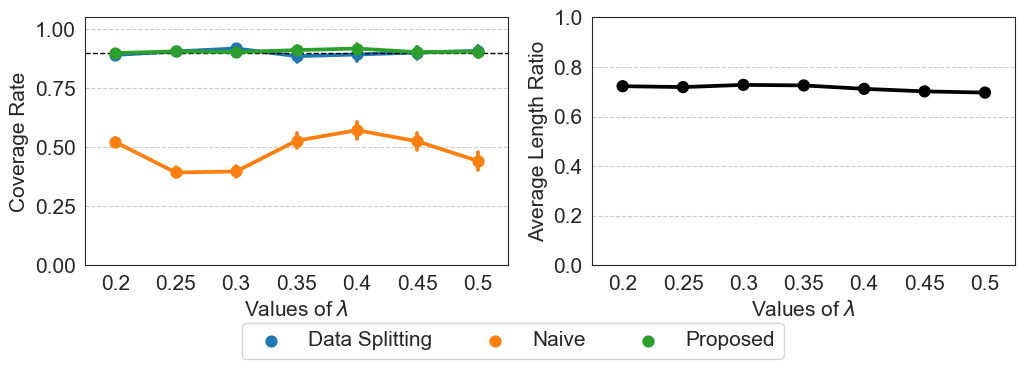

In [10]:
point_plot(oper_char, x_axis="weight const", hue="method", plot_len=False,
           plot_ratio=True)

# Plotting Varying Signals

In [11]:
def point_plot_multimetrics(oper_char_df, x_axis='p', hue='method', plot_size=False,
                            metric_list=None):
    oper_char_df = oper_char_df.copy()
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    n_subplots = len(metric_list)
    #cols = int(np.ceil(n_subplots / 2))
    cols = n_subplots
    
    print("Mean coverage rate/length:")
    print(oper_char_df[[x_axis, hue, 'coverage rate', 'avg length',
                        'F1 score (post inf)']].groupby([x_axis, hue]).mean())
    
    if "method" in oper_char_df.columns:
        alias = {"Approx":"Proposed", 
                 "Naive":"Naive",
                 "Data Splitting (50%)": "Data Splitting (50%)",
                 "Data Splitting (67%)": "Data Splitting (67%)"}
        #order = [alias[meth] for meth in order]
    
        oper_char_df['method'] = oper_char_df['method'].map(alias)
    
    fig = plt.figure(figsize=(cols * 5, 6))
    
    my_palette = {"Proposed": "#48c072", 
                  "Naive": "#fc5a50",
                  "Data Splitting (50%)": "#03719c",
                  "Data Splitting (67%)": "#3a18b1"}
    
    # Create each subplot
    for i in range(1, n_subplots + 1):
        # ax = fig.add_subplot(2, cols, i) #two rows
        ax = fig.add_subplot(1, cols, i) #one row
        if hue is not None:
            sns.pointplot(x=oper_char_df[x_axis], 
                          y=oper_char_df[metric_list[i-1]], 
                          hue = oper_char_df[hue],
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        else:
            sns.pointplot(x=oper_char_df[x_axis], 
                          y=oper_char_df[metric_list[i-1]], 
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        if metric_list[i-1] == 'coverage rate':
            ax.set_ylim([0, 1])
            ax.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
        if metric_list[i-1] == 'coverage rate':
            ax.set_ylabel("Coverage Rate", fontsize=15)  # remove y label, but keep ticks
        elif metric_list[i-1] == 'avg length':
            ax.set_ylim([0, 2.5])
            ax.set_ylabel("Average Length", fontsize=15)  # remove y label, but keep ticks
        elif metric_list[i-1] == 'F1 score (post inf)':
            ax.set_ylabel("Accuracy", fontsize=15)  # remove y label, but keep ticks
        else: 
            ax.set_ylabel(metric_list[i-1], fontsize=15)  # remove y label, but keep ticks
        ax.legend().set_visible(False)
        #ax.set_title(f'Category: {metric_list[i-1]}')
        
        # ax.set_xlabel('Signal Strength', fontsize=15)
        if x_axis == 'signal':
            ax.set_xlabel('Signal Strength', fontsize=15)
        elif x_axis == 'm':
            ax.set_xlabel('Sparsity', fontsize=15)

    handles, labels = ax.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=n_subplots,
               prop={'size': 15})

    #cov_plot.legend_.remove()
    #len_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

In [12]:
paths_result = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_375_500.csv"]
oper_char = combine_files(paths_result,)

In [13]:
oper_char

,"n,p",coverage rate,avg length,method,F1 score,F1 score (post inf),E size,Selection power,Cond. power,Power post inf,FDP,m
0,"(400,20)",1.00,0.492563,Data Splitting (50%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
1,"(400,20)",1.00,0.672369,Data Splitting (67%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
2,"(400,20)",0.75,0.261519,Approx,0.400000,1.000000,8,1.000000,1.000000,1.000000,0.0,1
3,"(400,20)",1.00,0.288610,Data Splitting (50%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
4,"(400,20)",1.00,0.438908,Data Splitting (67%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,"(400,20)",1.00,0.356854,Data Splitting (67%),0.041237,0.031088,8,0.021053,0.750000,0.015789,0.0,5
7496,"(400,20)",1.00,0.243503,Approx,0.128079,0.090452,26,0.068421,0.692308,0.047368,0.0,5
7497,"(400,20)",1.00,0.269148,Data Splitting (50%),0.020833,0.010471,4,0.010526,0.500000,0.005263,0.0,5
7498,"(400,20)",1.00,0.354755,Data Splitting (67%),0.020833,0.010471,4,0.010526,0.500000,0.005263,0.0,5


Mean coverage rate/length:
                        coverage rate  avg length  F1 score (post inf)
m method                                                              
1 Approx                     0.898702    0.458068             0.883210
  Data Splitting (50%)       0.875333    1.298265             0.950533
  Data Splitting (67%)       0.888667    1.741095             0.954533
2 Approx                     0.895041    0.243277             0.671408
  Data Splitting (50%)       0.909684    0.313759             0.571171
  Data Splitting (67%)       0.891395    0.396551             0.601568
3 Approx                     0.880004    0.243176             0.248520
  Data Splitting (50%)       0.898998    0.288621             0.156387
  Data Splitting (67%)       0.904012    0.367368             0.176447
4 Approx                     0.881398    0.246856             0.078905
  Data Splitting (50%)       0.904355    0.275420             0.028842
  Data Splitting (67%)       0.903423    0.350462 

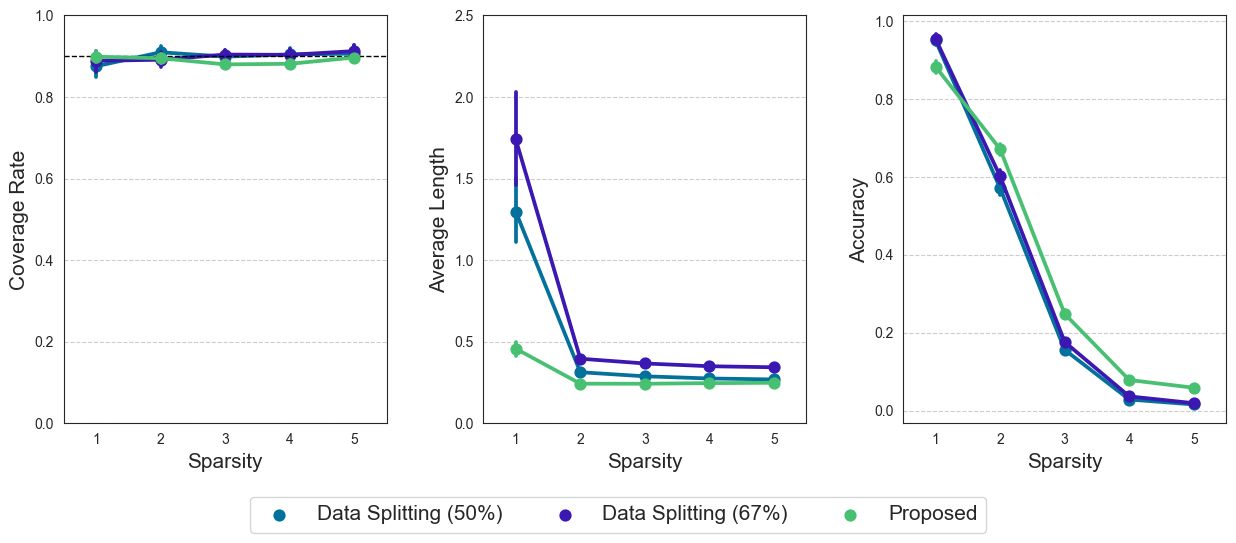

In [14]:
point_plot_multimetrics(oper_char, x_axis="m", 
                        hue='method', plot_size=True,
                        metric_list=['coverage rate', 'avg length',
                                     'F1 score (post inf)'])

# Calculating Length Ratio

In [15]:
paths_result_1 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity0/GGM_vary_sparsity0_375_500.csv"]
oper_char_1 = combine_files(paths_result_1,)
paths_result_2 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity1/GGM_vary_sparsity1_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity1/GGM_vary_sparsity1_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity1/GGM_vary_sparsity1_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity1/GGM_vary_sparsity1_375_500.csv"]
oper_char_2 = combine_files(paths_result_2,)
paths_result_3 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub0/GGM_vary_sparsity_hub0_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub0/GGM_vary_sparsity_hub0_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub0/GGM_vary_sparsity_hub0_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub0/GGM_vary_sparsity_hub0_375_500.csv"]
oper_char_3 = combine_files(paths_result_3,)
paths_result_4 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub1/GGM_vary_sparsity_hub1_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub1/GGM_vary_sparsity_hub1_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub1/GGM_vary_sparsity_hub1_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_sparsity_hub1/GGM_vary_sparsity_hub1_375_500.csv"]
oper_char_4 = combine_files(paths_result_4,)
# Vary signal
paths_result_5 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal0/GGM_vary_signal_logic0_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal0/GGM_vary_signal_logic0_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal0/GGM_vary_signal_logic0_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal0/GGM_vary_signal_logic0_375_500.csv"]
oper_char_5 = combine_files(paths_result_5,)
paths_result_6 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal1/GGM_vary_signal_logic1_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal1/GGM_vary_signal_logic1_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal1/GGM_vary_signal_logic1_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal1/GGM_vary_signal_logic1_375_500.csv"]
oper_char_6 = combine_files(paths_result_6,)
paths_result_7 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub0/GGM_vary_signal_hub0_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub0/GGM_vary_signal_hub0_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub0/GGM_vary_signal_hub0_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub0/GGM_vary_signal_hub0_375_500.csv"]
oper_char_7 = combine_files(paths_result_7,)
paths_result_8 = [
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub1/GGM_vary_signal_hub1_0_125.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub1/GGM_vary_signal_hub1_125_250.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub1/GGM_vary_signal_hub1_250_375.csv",
    "/Users/yilingh/Desktop/PhD/SI_Codes/SI_GGM_results/submission/vary_signal_hub1/GGM_vary_signal_hub1_375_500.csv"]
oper_char_8 = combine_files(paths_result_8,)

In [16]:
def calculate_ratio_two_prop(oper_char, proposed_name="Proposed", varied="m"):
    oper_char = oper_char.copy()
    oper_char['simulation_id'] = oper_char.index // 3
    # Reshaping the DataFrame to have one row per simulation with A, B, and C as columns
    reshaped_df = oper_char.pivot(index="simulation_id", 
                                   columns='method',
                                   values='avg length')
    drop = ((reshaped_df[proposed_name] == 0) + (reshaped_df['Data Splitting (50%)'] == 0) + (reshaped_df['Data Splitting (67%)'] == 0)) > 0
    reshaped_df = reshaped_df[~drop]
    # Calculating the ratio of 'length' between A and C
    reshaped_df['length_ratio (50%)'] = reshaped_df[proposed_name] / reshaped_df['Data Splitting (50%)']
    reshaped_df['length_ratio (67%)'] = reshaped_df[proposed_name] / reshaped_df['Data Splitting (67%)']
    
    # Extract the 'weight' column, since it's the same for each simulation you can simply drop duplicates
    weight_df = oper_char[['simulation_id', varied]].drop_duplicates()

    # Merge the two dataframes on 'simulation_id'
    result_df = reshaped_df.merge(weight_df, on='simulation_id')
    
    return result_df
    

In [17]:
ratio_1 = calculate_ratio_two_prop(oper_char_1, proposed_name="Approx", varied="m")
ratio_2 = calculate_ratio_two_prop(oper_char_2, proposed_name="Approx", varied="m")
ratio_3 = calculate_ratio_two_prop(oper_char_3, proposed_name="Approx", varied="K")
ratio_4 = calculate_ratio_two_prop(oper_char_4, proposed_name="Approx", varied="K")
ratio_5 = calculate_ratio_two_prop(oper_char_5, proposed_name="Approx", varied="signal")
ratio_6 = calculate_ratio_two_prop(oper_char_6, proposed_name="Approx", varied="signal")
ratio_7 = calculate_ratio_two_prop(oper_char_7, proposed_name="Approx", varied="signal")
ratio_8 = calculate_ratio_two_prop(oper_char_8, proposed_name="Approx", varied="signal")

In [18]:
(ratio_1[["length_ratio (50%)", "length_ratio (67%)", "m"]].groupby(["m"]).mean()).round(3).to_csv("ratio1.csv")

In [19]:
oper_char_2

,"n,p",coverage rate,avg length,method,F1 score,F1 score (post inf),E size,Selection power,Cond. power,Power post inf,FDP,m
0,"(400,20)",1.0,0.363869,Data Splitting (50%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
1,"(400,20)",1.0,0.483403,Data Splitting (67%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
2,"(400,20)",1.0,0.279655,Approx,1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
3,"(400,20)",1.0,0.284110,Data Splitting (50%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
4,"(400,20)",1.0,0.311631,Data Splitting (67%),1.000000,1.000000,2,1.000000,1.000000,1.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,"(400,20)",1.0,0.352396,Data Splitting (67%),0.041237,0.020833,8,0.021053,0.500000,0.010526,0.0,5
7496,"(400,20)",1.0,0.247288,Approx,0.051282,0.031088,10,0.026316,0.600000,0.015789,0.0,5
7497,"(400,20)",1.0,0.242285,Data Splitting (50%),0.010471,0.010471,2,0.005263,1.000000,0.005263,0.0,5
7498,"(400,20)",1.0,0.347725,Data Splitting (67%),0.020833,0.010471,4,0.010526,0.500000,0.005263,0.0,5
